In [2]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd
import seaborn as sns

In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
insights = pd.read_csv(r"C:\Users\Aashutosh Singh\OneDrive\Desktop\python\archive (2)\Computed insight - Success of active sellers.csv")
uc_sorted = pd.read_csv(r"C:\Users\Aashutosh Singh\OneDrive\Desktop\python\archive (2)\unique-categories.sorted-by-count.csv")
uc = pd.read_csv(r"C:\Users\Aashutosh Singh\OneDrive\Desktop\python\archive (2)\unique-categories.csv")
rating = pd.read_csv(r"C:\Users\Aashutosh Singh\OneDrive\Desktop\python\archive (2)\summer-products-with-rating-and-performance_2020-08.csv")

In [5]:
rating.head(5)

,index,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [6]:
print("Insight column shape = ",insights.shape)
print("uc column shape = ",uc.shape)
print("uc.sorted column shape = ",uc_sorted.shape)
print("rating column shape = ",rating.shape)

Insight column shape =  (958, 14)
uc column shape =  (2620, 2)
uc.sorted column shape =  (2620, 3)
rating column shape =  (1573, 44)


In [7]:
# Code for displaying all coluns while printing the dataset:
pd.set_option('display.max_columns', None)  # This will display all columns

In [8]:

# Concatenating all dataset:
combined_df = pd.concat([insights, uc, uc_sorted, rating], axis=1)

In [9]:
combined_df.head()

,index,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate,index,tag,index,count,tag,index,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,0.0,5357bcf2bb72c5504882e889,2.0,120000.0,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0,0,#fashion #shorts,0,1321,Summer,0.0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14.0,EUR,100.0,0.0,3.76,54.0,26.0,8.0,10.0,1.0,9.0,0.0,0.0,0.0,0.0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50.0,Livraison standard,4.0,0.0,34.0,50.0,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568.0,4.128521,595097d6a26f6e070cb878d1,0.0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,1.0,5708773c3c02161b3f8c7900,5.0,107100.0,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0,1,#fashion #tshirt,1,1315,Women's Fashion,1.0,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22.0,EUR,20000.0,1.0,3.45,6135.0,2269.0,1027.0,1118.0,644.0,1077.0,0.0,0.0,0.0,0.0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50.0,Livraison standard,2.0,0.0,41.0,50.0,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752.0,3.899673,56458aa03a698c35c9050988,0.0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2.0,5417aada4ad3ab27e954b76c,2.0,100007.0,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,NaN,NaN,2,#Sport Bra,2,1082,Fashion,2.0,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43.0,EUR,100.0,0.0,3.57,14.0,5.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1.0,Livraison standard,3.0,0.0,36.0,50.0,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295.0,3.989831,5d464a1ffdf7bc44ee933c65,0.0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,3.0,570f3a713a698c14278bb51e,1.0,100000.0,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.0,100.0,3,#Summer Clothes,3,961,Women,3.0,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8.0,EUR,5000.0,1.0,4.03,579.0,295.0,119.0,87.0,42.0,36.0,0.0,0.0,0.0,0.0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50.0,Livraison standard,2.0,0.0,41.0,50.0,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832.0,4.020435,58cfdefdacb37b556efdff7c,0.0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,4.0,53082ea15aefb07dfe1f2a4f,1.0,100000.0,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,NaN,NaN,4,#top #crop,4,905,Casual,4.0,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3.0,EUR,100.0,1.0,3.10,20.0,6.0,4.0,2.0,2.0,6.0,0.0,0.0,0.0,0.0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1.

In [10]:
combined_df.shape

(2620, 63)

In [11]:
# Dropping unnecessary columns:
combined_df.drop(columns=['merchantid','listedproducts','merchant_has_profile_picture','merchant_profile_picture','product_url','count','title','badges_count','badge_local_product','badge_product_quality','badge_fast_shipping','product_color','merchant_title','merchant_info_subtitle','product_id'],inplace=True, errors='ignore') 

In [12]:
combined_df.head()

,index,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate,index,tag,index,tag,index,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,tags,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_picture,theme,crawl_month
0,0.0,120000.0,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0,0,#fashion #shorts,0,Summer,0.0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14.0,EUR,100.0,0.0,3.76,54.0,26.0,8.0,10.0,1.0,9.0,"Summer,Fashion,womenunderwearsuit,printedpajam...",M,50.0,Livraison standard,4.0,0.0,34.0,50.0,1.0,Quantité limitée !,CN,zgrdejia,568.0,4.128521,595097d6a26f6e070cb878d1,https://contestimg.wish.com/api/webimage/5e9ae...,summer,2020-08
1,1.0,107100.0,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0,1,#fashion #tshirt,1,Women's Fashion,1.0,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22.0,EUR,20000.0,1.0,3.45,6135.0,2269.0,1027.0,1118.0,644.0,1077.0,"Mini,womens dresses,Summer,Patchwork,fashion d...",XS,50.0,Livraison standard,2.0,0.0,41.0,50.0,1.0,Quantité limitée !,CN,sarahouse,17752.0,3.899673,56458aa03a698c35c9050988,https://contestimg.wish.com/api/webimage/58940...,summer,2020-08
2,2.0,100007.0,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,NaN,NaN,2,#Sport Bra,2,Fashion,2.0,2020 New Arrival Women Spring and Summer Beach...,8.00,43.0,EUR,100.0,0.0,3.57,14.0,5.0,4.0,2.0,0.0,3.0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",XS,1.0,Livraison standard,3.0,0.0,36.0,50.0,1.0,Quantité limitée !,CN,hxt520,295.0,3.989831,5d464a1ffdf7bc44ee933c65,https://contestimg.wish.com/api/webimage/5ea10...,summer,2020-08
3,3.0,100000.0,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.0,100.0,3,#Summer Clothes,3,Women,3.0,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8.0,EUR,5000.0,1.0,4.03,579.0,295.0,119.0,87.0,42.0,36.0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",M,50.0,Livraison standard,2.0,0.0,41.0,50.0,NaN,NaN,CN,allenfan,23832.0,4.020435,58cfdefdacb37b556efdff7c,https://contestimg.wish.com/api/webimage/5cedf...,summer,2020-08
4,4.0,100000.0,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,NaN,NaN,4,#top #crop,4,Casual,4.0,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3.0,EUR,100.0,1.0,3.10,20.0,6.0,4.0,2.0,2.0,6.0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",S,1.0,Livraison standard,1.0,0.0,35.0,50.0,1.0,Quantité limitée !,CN,happyhorses,14482.0,4.001588,5ab3b592c3911a095ad5dadb,https://contestimg.wish.com/api/webimage/5ebf5...,summer,2020-08


In [13]:
# Removing few more unwanted columns:
combined_df.drop(columns=['meanunitssoldperproduct','merchant_id','product_picture'],inplace=True)
     

In [14]:
# Displaying new dataframe:
combined_df.shape
     

(2620, 45)

In [15]:

# Nulvalues count
null_values = combined_df.isnull().sum()

In [16]:

# Converting null values count in list
null_values_list=null_values.index.to_list()

In [17]:

# Information about new dataframe:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        958 non-null    float64
 1   totalunitssold               958 non-null    float64
 2   rating                       958 non-null    float64
 3   merchantratingscount         958 non-null    float64
 4   meanproductprices            958 non-null    float64
 5   meanretailprices             958 non-null    float64
 6   averagediscount              958 non-null    float64
 7   meandiscount                 958 non-null    float64
 8   meanproductratingscount      958 non-null    float64
 9   totalurgencycount            391 non-null    float64
 10  urgencytextrate              391 non-null    float64
 11  index                        2620 non-null   int64  
 12  tag                          2620 non-null   object 
 13  index             

In [18]:

 # Total null value:
 combined_df.isnull().sum()

index                          1662
totalunitssold                 1662
rating                         1662
merchantratingscount           1662
meanproductprices              1662
meanretailprices               1662
averagediscount                1662
meandiscount                   1662
meanproductratingscount        1662
totalurgencycount              2229
urgencytextrate                2229
index                             0
tag                               0
index                             0
tag                               0
index                          1047
title_orig                     1047
price                          1047
retail_price                   1047
currency_buyer                 1047
units_sold                     1047
uses_ad_boosts                 1047
rating                         1047
rating_count                   1047
rating_five_count              1092
rating_four_count              1092
rating_three_count             1092
rating_two_count            

In [19]:

# For loop for filling all null values:
for i in null_values_list:
  combined_df[i]= combined_df[i].fillna(0)


In [20]:
# Checking for duplicates:
combined_df.duplicated().sum()

0

Non-numeric columns: Index(['tag', 'tag', 'title_orig', 'currency_buyer', 'tags',
       'product_variation_size_id', 'shipping_option_name', 'urgency_text',
       'origin_country', 'merchant_name', 'theme', 'crawl_month'],
      dtype='object')


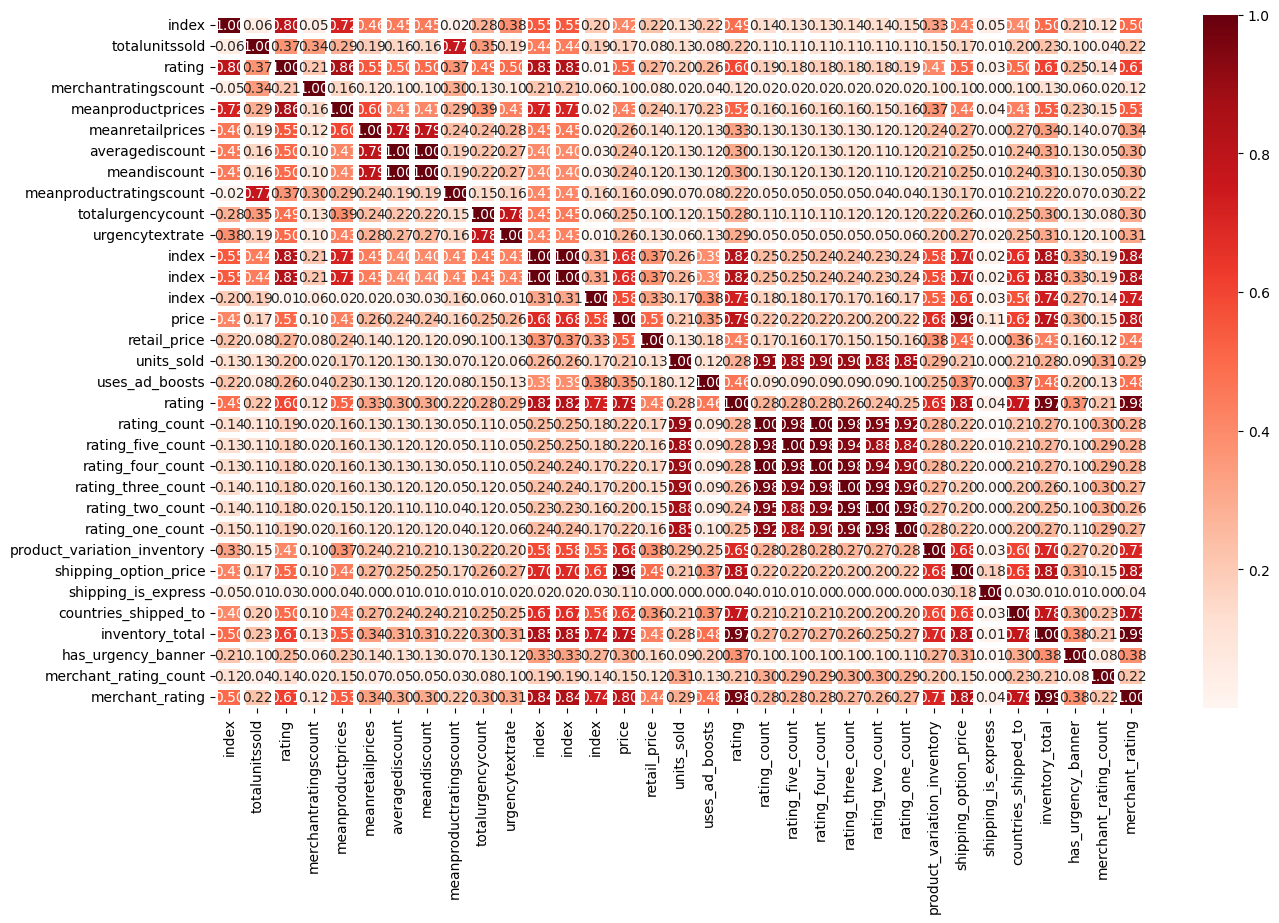

In [21]:
non_numeric_cols = combined_df.select_dtypes(include=['object']).columns

# Print non-numeric columns to understand the issue
print("Non-numeric columns:", non_numeric_cols)

# Option 1: Drop non-numeric columns
numeric_df = combined_df.drop(columns=non_numeric_cols)

# Option 2: Convert columns to numeric if possible
# combined_df[non_numeric_cols] = combined_df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Option 3: Drop rows/columns with invalid data
# combined_df = combined_df.dropna()

# Generate the heatmap with the cleaned DataFrame
plt.figure(figsize=(15, 9))
sns.heatmap(abs(numeric_df.corr()), cmap='Reds', annot=True, fmt='.2f', linewidths=3)
plt.show()

In [22]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        2620 non-null   float64
 1   totalunitssold               2620 non-null   float64
 2   rating                       2620 non-null   float64
 3   merchantratingscount         2620 non-null   float64
 4   meanproductprices            2620 non-null   float64
 5   meanretailprices             2620 non-null   float64
 6   averagediscount              2620 non-null   float64
 7   meandiscount                 2620 non-null   float64
 8   meanproductratingscount      2620 non-null   float64
 9   totalurgencycount            2620 non-null   float64
 10  urgencytextrate              2620 non-null   float64
 11  index                        2620 non-null   int64  
 12  tag                          2620 non-null   object 
 13  index             

In [23]:
combined_df['tag']=combined_df['tag'].replace(0,np.nan)
combined_df['title_orig']=combined_df['title_orig'].replace(0,np.nan)
combined_df['currency_buyer']=combined_df['currency_buyer'].replace(0,np.nan)
combined_df['tags']=combined_df['tags'].replace(0,np.nan)
combined_df['product_variation_size_id']=combined_df['product_variation_size_id'].replace(0,np.nan)
combined_df['shipping_option_name']=combined_df['shipping_option_name'].replace(0,np.nan)
combined_df['origin_country']=combined_df['origin_country'].replace(0,np.nan)
combined_df['merchant_name']=combined_df['merchant_name'].replace(0,np.nan)
combined_df['theme']=combined_df['theme'].replace(0,'summer')

In [24]:
# variance inflation factor:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def evaluate_vif(x):
  vif_data = pd.DataFrame()
  vif_data['variables'] = x.columns
  vif_data['vif'] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
  return vif_data

In [25]:
evaluate_vif(combined_df[[i for i in combined_df.describe().columns]])

c:\Users\Aashutosh Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,index,inf
1,index,inf
2,index,inf
3,index,inf
4,totalunitssold,4.060584e+00
5,rating,inf
6,rating,inf
7,merchantratingscount,1.186925e+00
8,meanproductprices,7.469865e+00
9,meanretailprices,4.531779e+00


                                                    rating_count
title_orig                                                      
Women Stretchy Camisole Spaghetti Strap Long Ta...       20744.0
Women's stripes Lined up double up tankini top ...       20502.0
Summer Women Sexy White Embroidery Lace Crop To...       18463.0
Women's Summer Sexy Sleeveless Turtleneck Mini ...       18393.0
2018 New Fashion Women's Tops Sexy Strappy Slee...       17980.0


<Figure size 600x400 with 0 Axes>

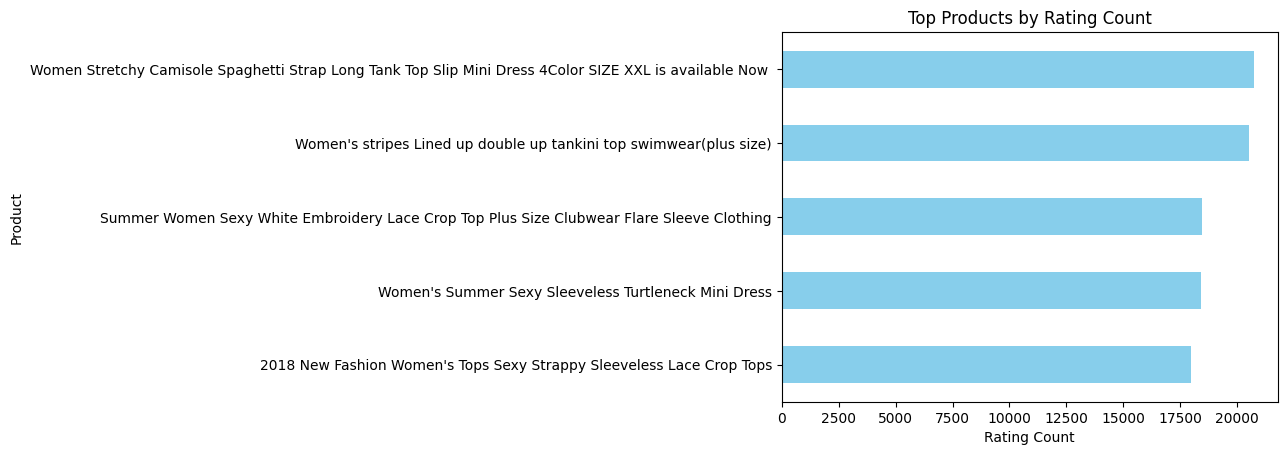

In [68]:
# top 5 products with highest no. of rating
top_products = combined_df.groupby('title_orig')['rating_count'].sum().reset_index().sort_values(by='rating_count', ascending=False).set_index('title_orig').head()
print(top_products)

plt.figure(figsize=(6, 4))
top_products.plot(kind='barh', color='skyblue', legend=False)
plt.title('Top Products by Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Product')
plt.gca().invert_yaxis() 
plt.show()

                                                    rating_count
title_orig                                                      
Women Stretchy Camisole Spaghetti Strap Long Ta...       20744.0
Women's stripes Lined up double up tankini top ...       20502.0
Summer Women Sexy White Embroidery Lace Crop To...       18463.0
Women's Summer Sexy Sleeveless Turtleneck Mini ...       18393.0
2018 New Fashion Women's Tops Sexy Strappy Slee...       17980.0


<AxesSubplot: ylabel='title_orig'>

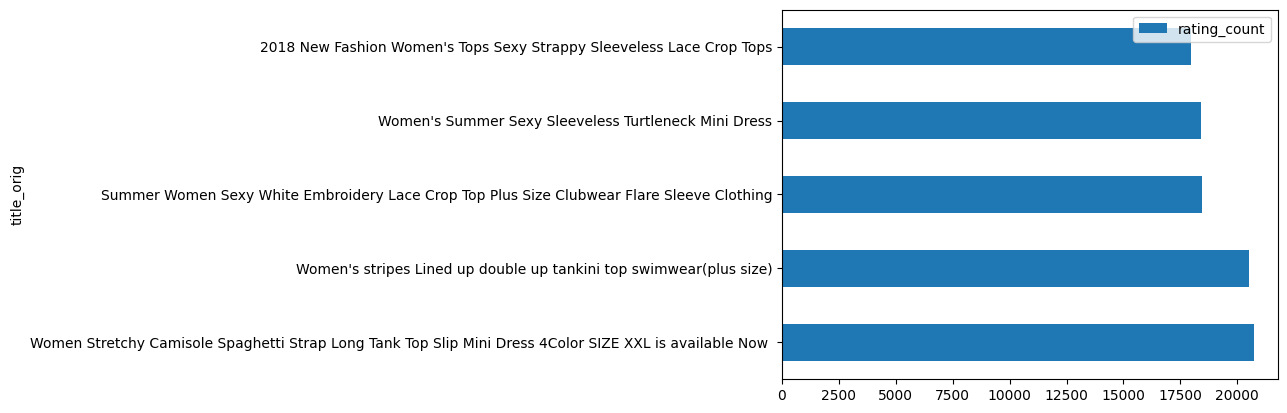

In [52]:

# top 5 products with highest no. of rating
top_products = combined_df.groupby('title_orig')['rating_count'].sum().reset_index().sort_values(by='rating_count',ascending=False).set_index('title_orig').head()
print(top_products)
top_products.plot(kind='barh')
# plt.xticks(rotation=40)
     

In [27]:
combined_df.head(2)

,index,totalunitssold,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate,index,tag,index,tag,index,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,tags,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_name,merchant_rating_count,merchant_rating,theme,crawl_month
0,0.0,120000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0,0,#fashion #shorts,0,Summer,0.0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14.0,EUR,100.0,0.0,3.76,54.0,26.0,8.0,10.0,1.0,9.0,"Summer,Fashion,womenunderwearsuit,printedpajam...",M,50.0,Livraison standard,4.0,0.0,34.0,50.0,1.0,Quantité limitée !,CN,zgrdejia,568.0,4.128521,summer,2020-08
1,1.0,107100.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0,1,#fashion #tshirt,1,Women's Fashion,1.0,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22.0,EUR,20000.0,1.0,3.45,6135.0,2269.0,1027.0,1118.0,644.0,1077.0,"Mini,womens dresses,Summer,Patchwork,fashion d...",XS,50.0,Livraison standard,2.0,0.0,41.0,50.0,1.0,Quantité limitée !,CN,sarahouse,17752.0,3.899673,summer,2020-08


                                                    units_sold
title_orig                                                    
Women Lace Short Sleeve Long Tops Blouse Shirt ...    100000.0
Womens Summer Red White and Blue Chiffon Short-...    100000.0
2018 New Fashion Women's Tops Sexy Strappy Slee...    100000.0
New Aeeival Women Clothing Long Sleeve Autumn W...    100000.0
Women's Summer Sexy Sleeveless Turtleneck Mini ...    100000.0


<Figure size 600x400 with 0 Axes>

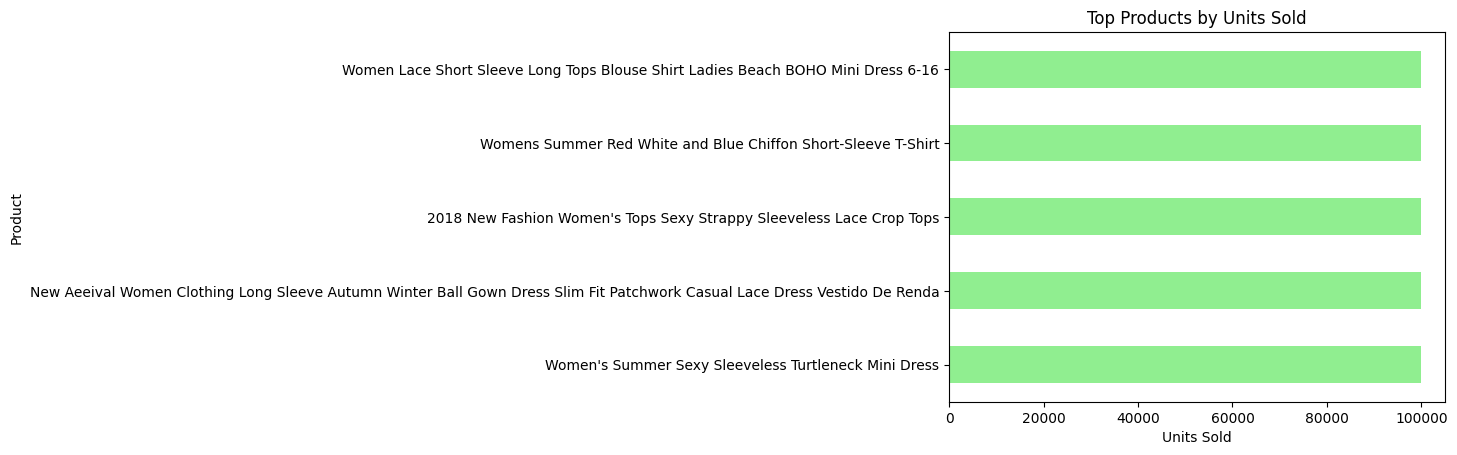

In [69]:
#Best Selling Products
unitssold_product = combined_df.groupby('title_orig')['units_sold'].sum().reset_index().sort_values(by='units_sold', ascending=False).set_index('title_orig').head()
print(unitssold_product)

plt.figure(figsize=(6, 4))
unitssold_product.plot(kind='barh', color='lightgreen', legend=False)
plt.title('Top Products by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.gca().invert_yaxis() 
plt.show()

                                                    units_sold
title_orig                                                    
Women Lace Short Sleeve Long Tops Blouse Shirt ...    100000.0
Womens Summer Red White and Blue Chiffon Short-...    100000.0
2018 New Fashion Women's Tops Sexy Strappy Slee...    100000.0
New Aeeival Women Clothing Long Sleeve Autumn W...    100000.0
Women's Summer Sexy Sleeveless Turtleneck Mini ...    100000.0


<AxesSubplot: ylabel='title_orig'>

<Figure size 1000x600 with 0 Axes>

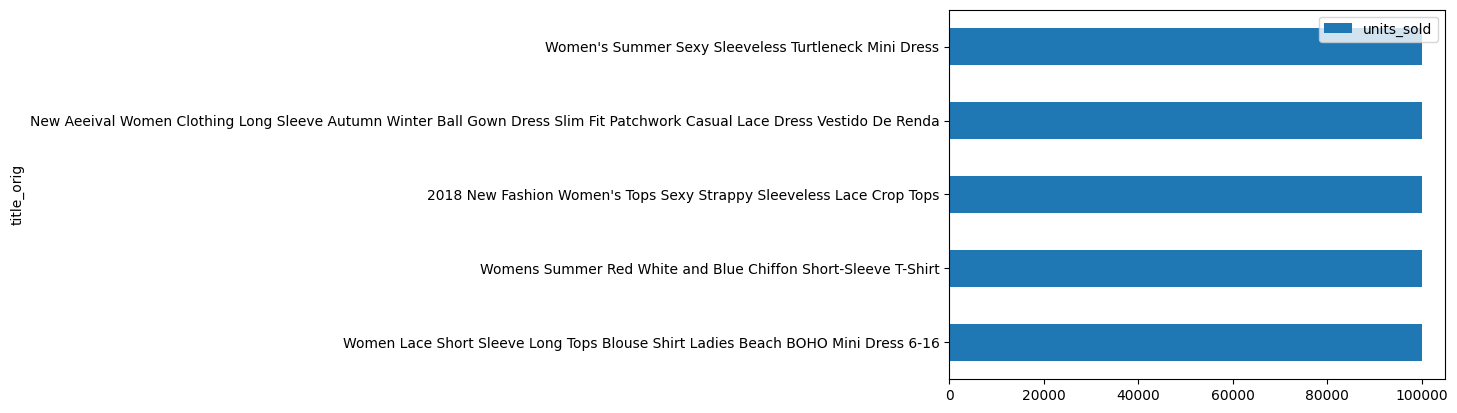

In [46]:
unitssold_product = combined_df.groupby('title_orig')['units_sold'].sum().reset_index().sort_values(by='units_sold',ascending=False).set_index('title_orig').head()
print(unitssold_product)
plt.figure(figsize=(10,6))
unitssold_product.plot(kind='barh')

In [29]:

combined_df.uses_ad_boosts=combined_df.uses_ad_boosts.astype('int64')

                units_sold
uses_ad_boosts            
0                3987435.0
1                2837820.0


<Figure size 1000x600 with 0 Axes>

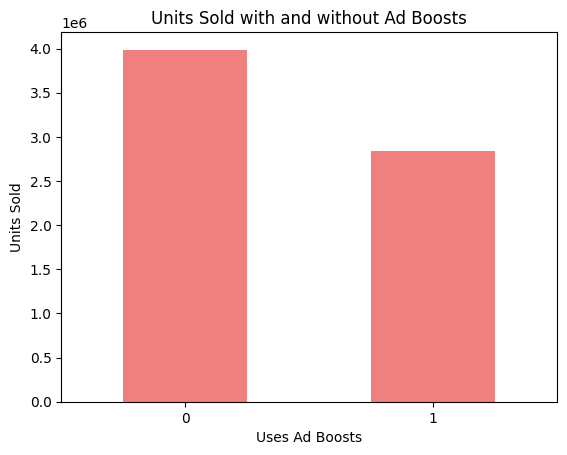

In [61]:
ad_unit_sold = combined_df.groupby('uses_ad_boosts')['units_sold'].sum().reset_index().set_index('uses_ad_boosts')
print(ad_unit_sold)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ad_unit_sold.plot(kind='bar', color='lightcoral', legend=False)
plt.title('Units Sold with and without Ad Boosts')
plt.xlabel('Uses Ad Boosts')
plt.ylabel('Units Sold')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot: xlabel='uses_ad_boosts'>

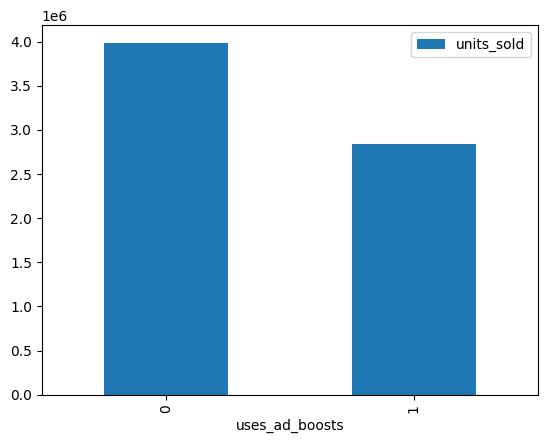

In [30]:
ad_unit_sold = combined_df.groupby('uses_ad_boosts')['units_sold'].sum().reset_index().set_index('uses_ad_boosts')
ad_unit_sold.plot(kind='bar')

In [31]:
ad_unit_sold


,units_sold
uses_ad_boosts,
0,3987435.0
1,2837820.0


In [32]:

combined_df.theme.value_counts()

theme
summer    2620
Name: count, dtype: int64